<a href="https://colab.research.google.com/github/prateekjoshi2013/data-science/blob/main/Data_Science_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization

There are two primary uses for data visualization:
1. To explore data
2. To communicate data

## Matlpotlib

A wide variety of tools exist for visualizing data. We will be using the matplotlib library, which is widely used (although sort of showing its age).

- If you are interested in producing elaborate interactive visualizations for the web, it is likely not the right choice

- for simple bar charts, line charts, and scatterplots, it works pretty well.

> Although we won’t be using much of this functionality, matplotlib
is capable of producing complicated plots within plots, sophisticated
formatting, and interactive visualizations.


### Pyplot module
- We will be using the matplotlib.pyplot module.
- In its simplest use, pyplot maintains an internal state in which you build up a visualization step by step.
- Once you’re done, you can save it with savefig or display it with show.

#### Line Chart

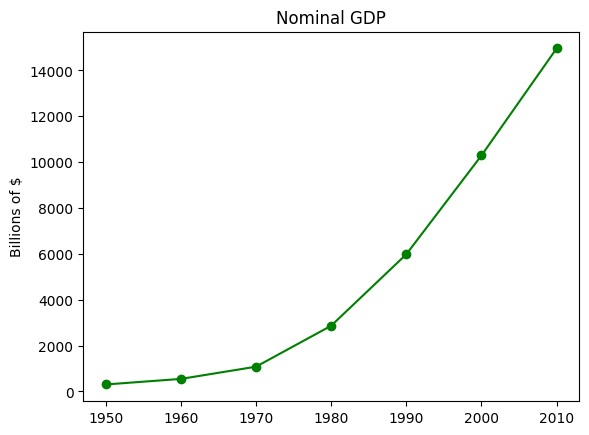

In [8]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()